In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
from tensorflow.keras.models import load_model

In [ ]:
train_path = '/content/drive/My Drive/db/train/'
test_path = '/content/drive/My Drive/db/test/'
folders = glob('/content/drive/My Drive/db/test/*')

In [ ]:
count={'covid': 0, 'normal': 0, 'pneumonia': 0}
for i in count.keys():
  train_path +=i
  test_path +=i
  path, dirs, Trfiles = next(os.walk(train_path))
  path, dirs, Tsfiles = next(os.walk(test_path))
  count[i] += len(Trfiles)+len(Tsfiles)
  train_path = '/content/drive/My Drive/db/train/'
  test_path = '/content/drive/My Drive/db/test/'


In [ ]:
count

{'covid': 163, 'normal': 937, 'pneumonia': 2540}

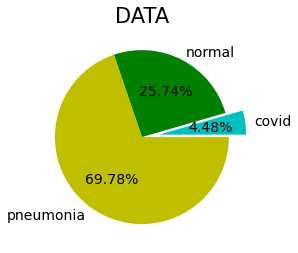

In [ ]:
keys = count.keys()
values = count.values()
colors = ['c', 'g', 'y']
plt.rcParams.update({'font.size': 14})
plt.pie(values, labels=keys, colors=colors,
        startangle=360,
        explode = (0.2, 0, 0),
        autopct = '%1.2f%%')
plt.title('DATA',fontdict = {'fontsize' : 21})
plt.show()

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array



In [ ]:
# Resnet Model call 
def resnet(img_path, img_size):
  # load all images into a list
  from tensorflow.keras.applications.resnet import preprocess_input
  images_gen = []
  dirs = ['covid/', 'normal/', 'pneumonia/']
  for next_path in dirs:
    next_path = os.path.join(img_path, next_path)
    for img in os.listdir(next_path):
      img = os.path.join(next_path, img)
      img = preprocess_input(get_img_array(img, size=img_size))
      images_gen.append(img)
  
  model = keras.models.load_model('/content/drive/MyDrive/db/models/resnet.h5')
  images_gen = np.vstack(images_gen)
  preds = model.predict(images_gen)
  predicted_values = np.argmax(preds,axis=1)
  print('Done............Resnet')
  return predicted_values

In [ ]:
# DenseNet Model
def densenet(img_path, img_size):
  from tensorflow.keras.applications.densenet import preprocess_input
  images_gen = []
  dirs = ['covid/', 'normal/', 'pneumonia/']

  for next_path in dirs:
    next_path = os.path.join(img_path, next_path)
    for img in os.listdir(next_path):
      img = os.path.join(next_path, img)
      img = preprocess_input(get_img_array(img, size=img_size))
      images_gen.append(img)

  images_gen = np.vstack(images_gen)
  model = keras.models.load_model('/content/drive/MyDrive/db/models/densenet201.h5')
  preds = model.predict(images_gen)
  
  predicted_values = np.argmax(preds, axis=1)
  print('Done....DenseNet')
  return predicted_values

In [ ]:
# Xception
def xception(img_path, img_size):
  from tensorflow.keras.applications.xception import preprocess_input
  images_gen = []
  dirs = ['covid/', 'normal/', 'pneumonia/']

  for next_path in dirs:
    next_path = os.path.join(img_path, next_path)
    for img in os.listdir(next_path):
      img = os.path.join(next_path, img)
      img = preprocess_input(get_img_array(img, size=img_size))
      images_gen.append(img)

  images_gen = np.vstack(images_gen)
  model = keras.models.load_model('/content/drive/MyDrive/db/models/xception.h5')
  preds = model.predict(images_gen)
  predicted_values = np.argmax(preds, axis=1)
  print('Done..........xception')
  return predicted_values


In [ ]:
def alexnet(img_path, img_size):
  
  images_gen = []
  dirs = ['covid/', 'normal/', 'pneumonia/']

  for next_path in dirs:
    next_path = os.path.join(img_path, next_path)
    for img in os.listdir(next_path):
      img = os.path.join(next_path, img)
      img = get_img_array(img, size=img_size)
      images_gen.append(img)

  images_gen = np.vstack(images_gen)
  model = keras.models.load_model('/content/drive/MyDrive/db/models/alexnet.h5')
  preds = model.predict(images_gen)
  predicted_values = np.argmax(preds,axis=1)
  print('Done.......Alexnet')
  return predicted_values
  

In [ ]:
def nasnet(img_path, img_size):
  from tensorflow.keras.applications.nasnet import preprocess_input
  images_gen = []
  dirs = ['covid/', 'normal/', 'pneumonia/']

  for next_path in dirs:
    next_path = os.path.join(img_path, next_path)
    
    for img in os.listdir(next_path):
      img = os.path.join(next_path, img)
      img = preprocess_input(get_img_array(img, size=img_size))
      images_gen.append(img)

  images_gen = np.vstack(images_gen)
  model = keras.models.load_model('/content/drive/MyDrive/db/models/nasnet.h5')
  preds = model.predict(images_gen)
  #Increasing weights since this model has shown high accuracy and reliability
  predicted_values = np.argmax(preds,axis=1)
  print('DOne.........NasNet')
  return predicted_values


In [ ]:
# VGG16 Model
def vgg16(img_path, img_size):
  from tensorflow.keras.applications.vgg16 import preprocess_input
  images_gen = []
  dirs = ['covid/', 'normal/', 'pneumonia/']

  for next_path in dirs:
    next_path = os.path.join(img_path, next_path)
    for img in os.listdir(next_path):
      img = os.path.join(next_path, img)
      img = preprocess_input(get_img_array(img, size=img_size))
      images_gen.append(img)

  images_gen = np.vstack(images_gen)
  model = keras.models.load_model('/content/drive/MyDrive/db/models/vgg_model.h5')
  preds = model.predict(images_gen)
  predicted_values = np.argmax(preds,axis=1)
  print('Done.........VGG16')
  return predicted_values


In [ ]:
# myModel
def myModel(img_path, img_size):
  
  images_gen = []
  dirs = ['covid/', 'normal/', 'pneumonia/']

  for next_path in dirs:
    next_path = os.path.join(img_path, next_path)
    
    for img in os.listdir(next_path):
      img = os.path.join(next_path, img)
      img = get_img_array(img, size=img_size)
      images_gen.append(img)

  images_gen = np.vstack(images_gen)
  model = keras.models.load_model('/content/drive/MyDrive/db/models/myModel.h5')
  preds = model.predict(images_gen)
  predicted_values = np.argmax(preds,axis=1)
  print('Done.......MyModel')
  return predicted_values


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/db/train',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2950 images belonging to 3 classes.


In [ ]:
resnet_predictions = resnet('/content/drive/My Drive/db/test/',(224, 224))
alexnet_predictions = alexnet('/content/drive/My Drive/db/test/',(150, 150))
densenet_predictions = densenet('/content/drive/My Drive/db/test/',(224, 224))
nassnet_predictions = nasnet('/content/drive/My Drive/db/test/',(331, 331))
xception_predictions = xception('/content/drive/My Drive/db/test/',(299, 299))
vgg_predictions = vgg16('/content/drive/My Drive/db/test/',(299, 299))
mymodel_predictions = myModel('/content/drive/My Drive/db/test/',(224, 224))

Done............Resnet
Done.......Alexnet
Done....DenseNet
DOne.........NasNet
Done..........xception
Done.........VGG16
Done.......MyModel


In [ ]:
model_preds = np.vstack((resnet_predictions, alexnet_predictions, densenet_predictions, nassnet_predictions, xception_predictions, vgg_predictions, mymodel_predictions)).T
model_predictions_weights = []
model_predictions = []

In [ ]:
for i in model_preds:
  preds = list(i)
  model_predictions.append(max(set(preds), key=preds.count))
  for j in range(len(i)):
    if j==3 or j == 4 or j == 2:
      tmp = i[j]
      i = np.append(i, tmp)
      i = np.append(i, tmp)
  preds_weights = list(i)
  model_predictions_weights.append(max(set(preds_weights), key=preds_weights.count))

In [ ]:
test_datagen = ImageDataGenerator()
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/db/test',
                                            target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 690 images belonging to 3 classes.


In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('jet')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

Confusion Matrix 
 [[ 10   3   0]
 [  0 137   0]
 [  0  62 478]]



 Classification Report
              precision    recall  f1-score   support

      Corona       1.00      0.77      0.87        13
      Normal       0.68      1.00      0.81       137
   Pneumonia       1.00      0.89      0.94       540

    accuracy                           0.91       690
   macro avg       0.89      0.88      0.87       690
weighted avg       0.94      0.91      0.91       690
 

F1 Score 0.9141479683539481
MCC 	 0.7855614146689707
Accuracy Score 	 0.9057971014492754


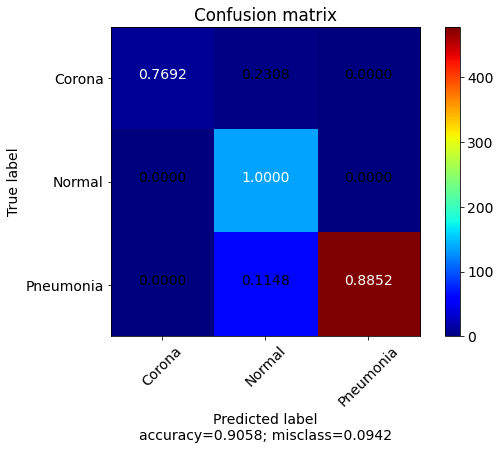

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, matthews_corrcoef
target_names = ['Corona', 'Normal', 'Pneumonia']
cm = confusion_matrix(test_set.classes, model_predictions)
print('Confusion Matrix \n', cm)
print('\n\n\n','Classification Report')
print(classification_report(test_set.classes, model_predictions, target_names=target_names), '\n')
print('F1 Score', f1_score(test_set.classes, model_predictions_weights, average='weighted'))
print('MCC \t' , matthews_corrcoef(test_set.classes, model_predictions))
print('Accuracy Score \t', accuracy_score(test_set.classes, model_predictions))
plot_confusion_matrix(cm, target_names)

Confusion Matrix 
 [[ 10   2   1]
 [  0 137   0]
 [  0  60 480]]



 Classification Report
              precision    recall  f1-score   support

      Corona       1.00      0.77      0.87        13
      Normal       0.69      1.00      0.82       137
   Pneumonia       1.00      0.89      0.94       540

    accuracy                           0.91       690
   macro avg       0.90      0.89      0.88       690
weighted avg       0.94      0.91      0.91       690
 

F1 Score 0.9141479683539481
MCC 	 0.7896897994350306
Accuracy Score 	 0.908695652173913


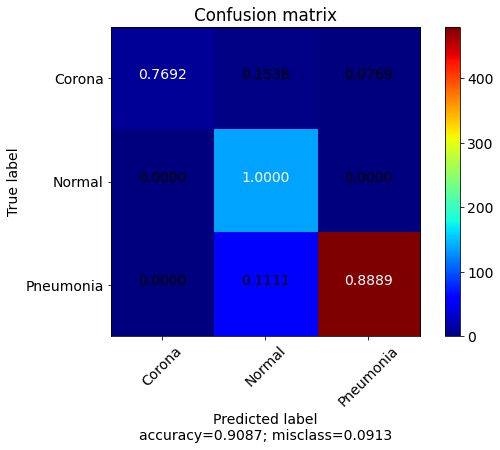

In [ ]:
cm = confusion_matrix(test_set.classes, model_predictions_weights)
print('Confusion Matrix \n', cm)
print('\n\n\n','Classification Report')
print(classification_report(test_set.classes, model_predictions_weights, target_names=target_names), '\n')
print('F1 Score',f1_score(test_set.classes, model_predictions_weights, average='weighted'))
print('MCC \t', matthews_corrcoef(test_set.classes, model_predictions_weights))
print('Accuracy Score \t', accuracy_score(test_set.classes, model_predictions_weights))
plot_confusion_matrix(cm, target_names)